<a href="https://colab.research.google.com/github/FRC-Team5811/Vision_Pipeline_Python/blob/main/BONDS_ai_vision_pipeline_thingy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>

[中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>We hope that the resources in this notebook will help you get the most out of YOLOv5. Please browse the YOLOv5 <a href="https://docs.ultralytics.com/yolov5">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/yolov5">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-393-g6981c274 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 46.6/112.6 GB disk)


# 3. Train

<p align=""><a href="https://ultralytics.com/hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Label a dataset on Roboflow (optional)

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


In [ ]:
#dataset goes here
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AFpSrWmhOiSGorei8cOh")
project = rf.workspace("michael-jansen").project("frc-2024-tlxdn")
version = project.version(4)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FRC-2024-4 in yolov5pytorch:: 100%|██████████| 15867/15867 [00:04<00:00, 3392.13it/s]


In [ ]:
# Train YOLOv5s
# epochs should be changed, more epochs generally means better model but takes longer to train
# parameter for img is image size


!python train.py --img 640 --batch 16 --epochs 3 --data FRC-2024-4/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=FRC-2024-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-393-g6981c274 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-393-g6981c274 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


--2025-01-09 00:30:38--  https://i.ytimg.com/vi/FxU_oQGLAe0/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD
Resolving i.ytimg.com (i.ytimg.com)... 74.125.128.119, 74.125.143.119, 173.194.69.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|74.125.128.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147498 (144K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 144.04K  --.-KB/s    in 0.001s  

2025-01-09 00:30:38 (95.9 MB/s) - ‘image.jpg’ saved [147498/147498]



`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
WARNING ⚠️ NMS time limit 0.550s exceeded


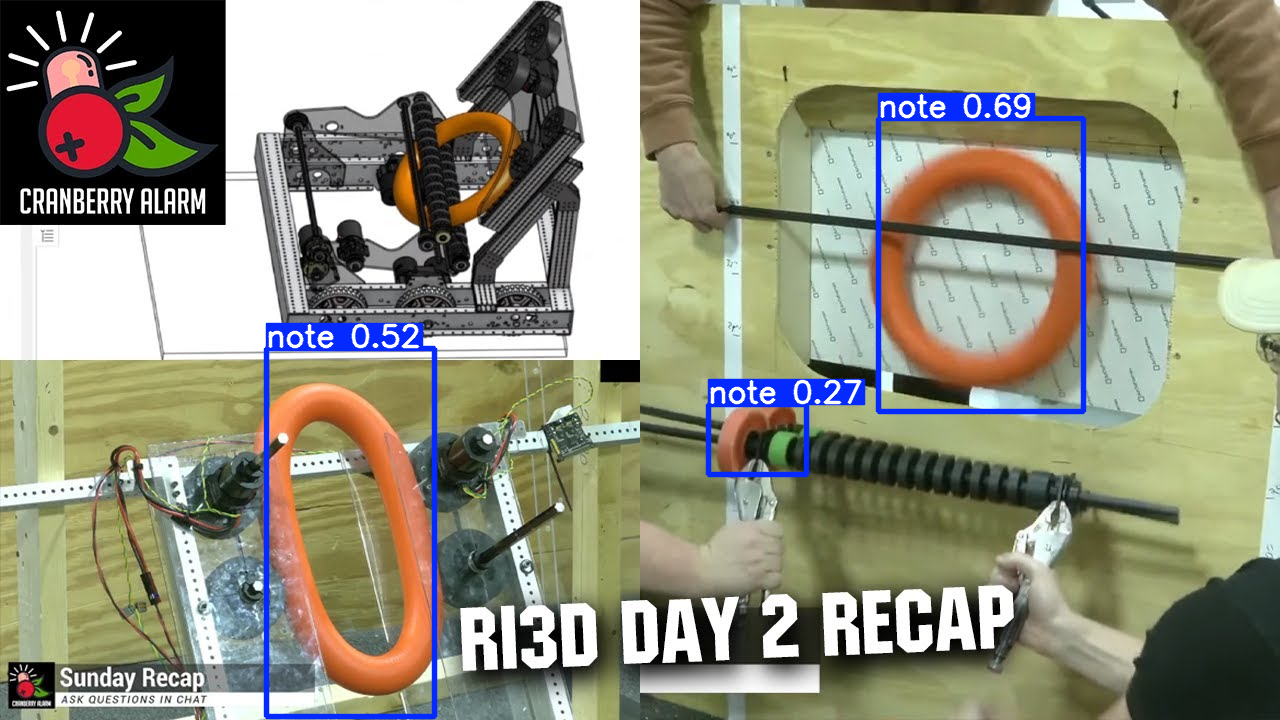

In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)
!wget -O image.jpg https://i.ytimg.com/vi/FxU_oQGLAe0/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLBu-Sw1fUcbZ_ozm_4N1_yaC5YHqg
results = model('image.jpg')
results.show()

# Convert to rknn, ONLY DO THIS AT END
P.S. converting to rknn is unstable, it sometimes just breaks the model and always makes it significantly less accurate.

In [ ]:
%cd /
!git clone https://github.com/airockchip/yolov5/
%cd /yolov5
!git checkout d25a07534c14f44296f9444bab2aa5c601cdaaab

!pip install -qr requirements.txt

/
Cloning into 'yolov5'...
remote: Enumerating objects: 11515, done.
remote: Total 11515 (delta 0), reused 0 (delta 0), pack-reused 11515 (from 1)
Receiving objects: 100% (11515/11515), 66.04 MiB | 34.15 MiB/s, done.
Resolving deltas: 100% (7572/7572), done.
/yolov5
Note: switching to 'd25a07534c14f44296f9444bab2aa5c601cdaaab'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at d25a075 rk opt for yolov5 base@rk_85c6d7d2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.2 MB/s eta 0:00:00


In [ ]:
import os
latest_modified_time = 0
latest = None
%cd /
for foldername, subfolders, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if filename == "best.pt":
            file_path = os.path.join(foldername, filename)
            modified_time = os.path.getmtime(file_path)
            if modified_time > latest_modified_time:
                latest_modified_time = modified_time
                latest = file_path
print(latest, latest_modified_time)
%cd /yolov5
!python export.py --rknpu --weight {latest}

/
/content/yolov5/runs/train/exp/weights/best.pt 1736381715.8899653
/yolov5
export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx'], rknpu=True
YOLOv5 🚀 v4.0-1657-gd25a075 Python-3.10.12 torch-2.5.1+cu124 CPU

/yolov5/models/experimental.py:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to 

In [ ]:
!wget https://github.com/rockchip-linux/rknn-toolkit2/raw/2c2d03def0c0908c86985b8190e973976ecec74c/rknn-toolkit2/packages/rknn_toolkit2-1.6.0+81f21f4d-cp310-cp310-linux_x86_64.whl
!pip install ./rknn_toolkit2-1.6.0+81f21f4d-cp310-cp310-linux_x86_64.whl
%cd /content
!git clone https://github.com/airockchip/rknn_model_zoo/
%cd rknn_model_zoo
!git checkout eaa94d6f57ca553d493bf3bd7399a070452d2774
%cd examples/yolov5/python
%cd /content/rknn_model_zoo/examples/yolov5/python
!python convert.py /content/best.onnx rk3588 "i8" /content/best.rknn

--2025-01-09 00:42:14--  https://github.com/rockchip-linux/rknn-toolkit2/raw/2c2d03def0c0908c86985b8190e973976ecec74c/rknn-toolkit2/packages/rknn_toolkit2-1.6.0+81f21f4d-cp310-cp310-linux_x86_64.whl
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rockchip-linux/rknn-toolkit2/2c2d03def0c0908c86985b8190e973976ecec74c/rknn-toolkit2/packages/rknn_toolkit2-1.6.0%2B81f21f4d-cp310-cp310-linux_x86_64.whl [following]
--2025-01-09 00:42:14--  https://raw.githubusercontent.com/rockchip-linux/rknn-toolkit2/2c2d03def0c0908c86985b8190e973976ecec74c/rknn-toolkit2/packages/rknn_toolkit2-1.6.0%2B81f21f4d-cp310-cp310-linux_x86_64.whl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443

In [ ]:
!source /opt/miniforge3/bin/activate

/bin/bash: line 1: /opt/miniforge3/bin/activate: No such file or directory
